## **GUÍA MODELADO GUROBIPY**

La siguiente es un guía para entender la interfaz de gurobipy y como trabajar con los 5 items estándar de los modelos de optimización.

1. Conjuntos
2. Parámetros
3. Variables
4. Función Objetivo
5. Restricciones

También se muestran algunas funcionalidades que ofrece gurobipy para configuración y posprocesamiento


##### **Conjuntos**


In [2]:
## Listas 😊
A = ["a1", "a2", "a3"]

## Conjuntos ❓
B = {1, 2, 3, 4, 5, 6, 7}

##### **Parámetros**


In [3]:
## Diccionario 1
parametro_1 = {
    (1, 1, 1): 123,
    (1, 1, 2): 178,
    (1, 2, 1): 165,
    (1, 2, 2): 143,
    (2, 1, 1): 154,
    (2, 1, 2): 151,
    (2, 2, 1): 163,
    (2, 2, 2): 132,
}

## Diccionario 2
parametro_2 = {1: {1: 2133, 2: 1344}, 2: {1: 1455, 2: 2200}}

## Dataframe ❓
import pandas

data = {
    ("Categoria A", "Producto 1"): [10, 5],
    ("Categoria A", "Producto 2"): [15, 3],
    ("Categoria B", "Producto 1"): [20, 7],
    ("Categoria B", "Producto 2"): [25, 2],
}

df = pandas.DataFrame.from_dict(data, orient="index", columns=["Precio", "Cantidad"])
df.index = pandas.MultiIndex.from_tuples(df.index)
df

Precio  Cantidad
Categoria A Producto 1      10         5
            Producto 2      15         3
Categoria B Producto 1      20         7
            Producto 2      25         2

In [4]:
parametro_1[2, 2, 1]

163

In [5]:
parametro_2[2][1]

1455

In [6]:
df.loc[("Categoria A", "Producto 1"), "Precio"]

10

##### **Creación de modelo**


In [7]:
## Importanto DoCplex
import gurobipy as gp
from gurobipy import GRB

In [8]:
# Inicializando el modelo
model = gp.Model("el nombre de mi modelo")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-28


##### **Variables**


##### Variables simples


In [9]:
c = model.addVar(vtype=GRB.CONTINUOUS, name="c")

In [10]:
b = model.addVar(vtype=GRB.BINARY, name="i")

In [11]:
i = model.addVar(vtype=GRB.INTEGER, name="i")

In [12]:
var_a = model.addVars(A, vtype=GRB.BINARY)
var_a

{'a1': <gurobi.Var *Awaiting Model Update*>,
 'a2': <gurobi.Var *Awaiting Model Update*>,
 'a3': <gurobi.Var *Awaiting Model Update*>}

In [13]:
var_ab = model.addVars([(a, b) for a in A for b in B], vtype=GRB.CONTINUOUS)
var_ab

{('a1', 1): <gurobi.Var *Awaiting Model Update*>,
 ('a1', 2): <gurobi.Var *Awaiting Model Update*>,
 ('a1', 3): <gurobi.Var *Awaiting Model Update*>,
 ('a1', 4): <gurobi.Var *Awaiting Model Update*>,
 ('a1', 5): <gurobi.Var *Awaiting Model Update*>,
 ('a1', 6): <gurobi.Var *Awaiting Model Update*>,
 ('a1', 7): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 1): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 2): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 3): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 4): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 5): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 6): <gurobi.Var *Awaiting Model Update*>,
 ('a2', 7): <gurobi.Var *Awaiting Model Update*>,
 ('a3', 1): <gurobi.Var *Awaiting Model Update*>,
 ('a3', 2): <gurobi.Var *Awaiting Model Update*>,
 ('a3', 3): <gurobi.Var *Awaiting Model Update*>,
 ('a3', 4): <gurobi.Var *Awaiting Model Update*>,
 ('a3', 5): <gurobi.Var *Awaiting Model Update*>,
 ('a3', 6): <gurobi.Var *Awaiting Model Update*>,


##### **Función Objetivo**


In [14]:
x = model.addVar()
y = model.addVar()

## FO explícita
model.setObjective(x + y, GRB.MINIMIZE)

## FO compacta
model.setObjective(gp.quicksum(var_a[a] for a in A), GRB.MAXIMIZE)

##### **Restricciones**


In [15]:
## Restricción explicita
model.addConstr(x + y <= 100, name="ct_1")

<gurobi.Constr *Awaiting Model Update*>

In [16]:
## Restricción compacta
for a in A:
    model.addConstr(var_a[a] <= 100, name="el nomobre de la restriccion")

In [17]:
for a in A:
    for b in B:
        model.addConstr(var_ab[a, b] <= 1)

In [18]:
model.addConstrs((var_a[a] <= 100 for a in A))

{'a1': <gurobi.Constr *Awaiting Model Update*>,
 'a2': <gurobi.Constr *Awaiting Model Update*>,
 'a3': <gurobi.Constr *Awaiting Model Update*>}

##### **POSPROCESAMIENTO Y CONFIGURACIONES**

##### Resolver un modelo

In [19]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("buses")
nbbus40 = model.addVar(vtype=GRB.INTEGER, name="nbBus40")
nbbus30 = model.addVar(vtype=GRB.INTEGER, name="nbBus30")

# Definir la función objetivo
model.setObjective(nbbus40 * 500 + nbbus30 * 400, GRB.MINIMIZE)

# Añadir la restricción
model.addConstr(nbbus40 * 40 + nbbus30 * 30 >= 300, name="kids")

# Optimizar el modelo
model.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0x15e5435c
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e+01, 4e+01]
  Objective range  [4e+02, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 3e+02]
Found heuristic solution: objective 4000.0000000
Presolve removed 1 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 3800 4000 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.800000000000e+03, best bound 3.800000000000e+03, gap 0.0000%


##### Status Modelo

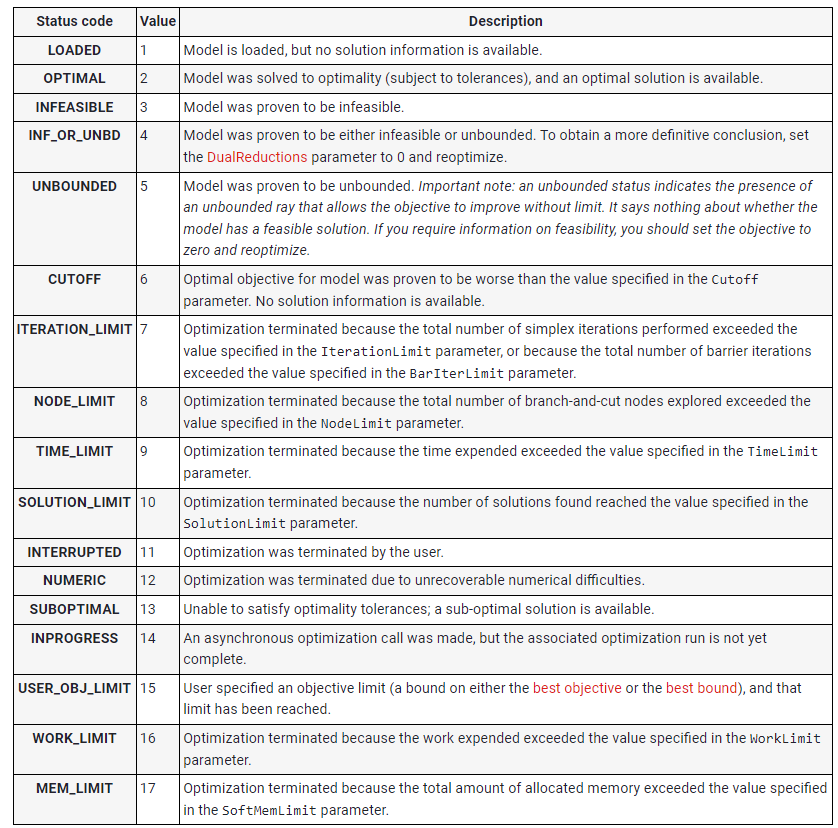

In [20]:
model.status

2

##### Obtener valor variables

In [21]:
nbbus40.X

6.0

In [22]:
nbbus30.X

2.0

##### Obtener valor función objetivo

In [23]:
model.ObjVal

3800.0

In [24]:
model.write("buses.lp")

In [25]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("buses")
nbbus40 = model.addVar(vtype=GRB.INTEGER, name="nbBus40")
nbbus30 = model.addVar(vtype=GRB.INTEGER, name="nbBus30")

# Definir la función objetivo
model.setObjective(nbbus40 * 500 + nbbus30 * 400, GRB.MINIMIZE)

# Añadir la restricción
model.addConstr(nbbus40 * 40 + nbbus30 * 30 >= 300, name="kids")

model.setParam("Timelimit", 300)

# Optimizar el modelo
model.optimize()

Set parameter TimeLimit to value 300
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0x15e5435c
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [3e+01, 4e+01]
  Objective range  [4e+02, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 3e+02]
Found heuristic solution: objective 4000.0000000
Presolve removed 1 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 2: 3800 4000 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.800000000000e+03, best bound 3.800000000000e+03, gap 0.000

In [ ]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("buses")
nbbus40 = model.addVar(vtype=GRB.INTEGER, name="nbBus40")
nbbus30 = model.addVar(vtype=GRB.INTEGER, name="nbBus30")

# Definir la función objetivo
model.setObjective(nbbus40 * 500 + nbbus30 * 400, GRB.MINIMIZE)

# Añadir la restricción
model.addConstr(nbbus40 * 40 + nbbus30 * 30 >= 300, name="kids")

model.setParam("MIPGap", 0.05)

# Optimizar el modelo
model.optimize()